In [ ]:
!pip install pandas numpy matplotlib seaborn yfinance ccxt MetaTrader5 backtrader tensorflow scikit-learn

  Using cached ccxt-4.4.64-py2.py3-none-any.whl.metadata (130 kB)
ERROR: Could not find a version that satisfies the requirement MetaTrader5 (from versions: none)
ERROR: No matching distribution found for MetaTrader5


In [ ]:
!pip install backtrader

Saving Gold Futures Historical Data.csv to Gold Futures Historical Data.csv
         Date     Price      Open      High       Low     Vol. Change %
0  02/25/2025  2,915.00  2,965.99  2,968.40  2,911.26  155.51K   -1.63%
1  02/24/2025  2,963.20  2,950.40  2,974.00  2,936.80  162.78K    0.34%
2  02/21/2025  2,953.20  2,955.70  2,964.70  2,930.10  163.69K   -0.10%
3  02/20/2025  2,956.10  2,949.50  2,973.40  2,939.30  172.20K    0.68%
4  02/19/2025  2,936.10  2,954.10  2,964.40  2,933.70  159.34K   -0.44%
   timestamp     open    high      low   close
0 2025-02-25  2965.99  2968.4  2911.26  2915.0
1 2025-02-24  2950.40  2974.0  2936.80  2963.2
2 2025-02-21  2955.70  2964.7  2930.10  2953.2
3 2025-02-20  2949.50  2973.4  2939.30  2956.1
4 2025-02-19  2954.10  2964.4  2933.70  2936.1
     close  support  resistance
11  2887.6   2876.1      2973.4
12  2876.7   2855.0      2973.4
13  2893.0   2855.0      2968.5
14  2875.8   2837.4      2968.5
15  2857.1   2802.2      2968.5
16  2835.0   2802.

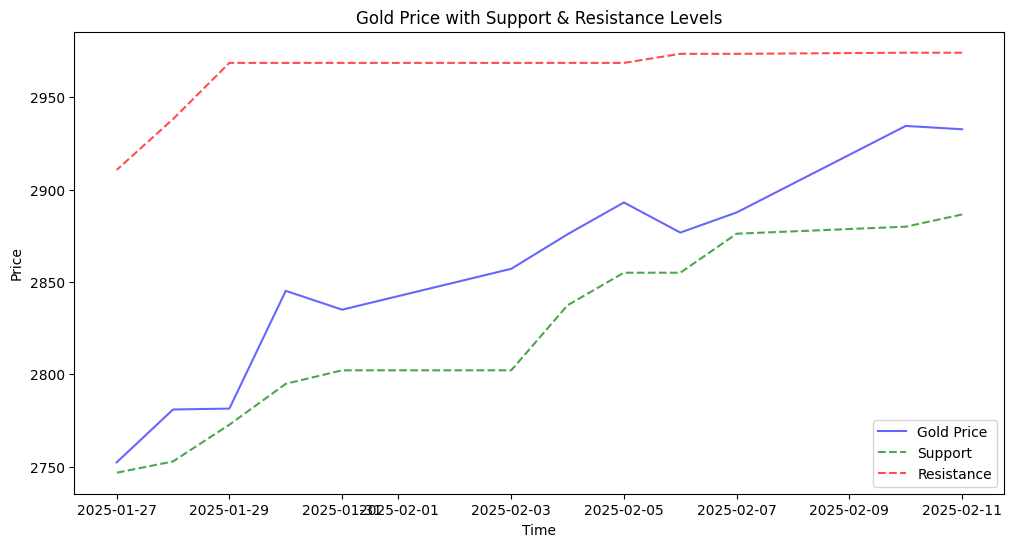

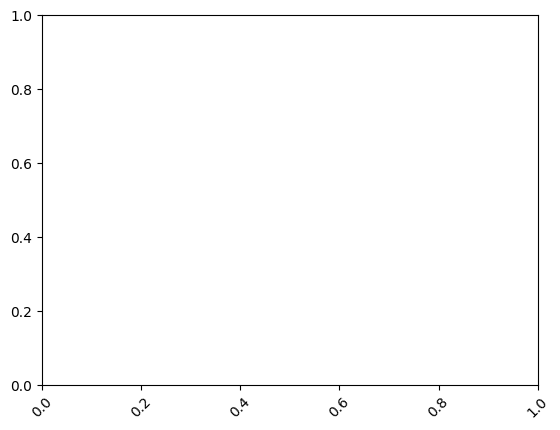

In [ ]:
# Import required libraries
import pandas as pd   #Handles data in table format
import yfinance as yf #gets financial data
import datetime       #Handles date and time
import numpy as np    #For numerical operations
import matplotlib.pyplot as plt  # For visualization
#import ccxt           #Import CCXT library for broker API

# Define Gold
# Define correct parameters
#ticker = "XAUUSD=X"  # Gold Spot Price (Forex)
#interval = "15m"  # Correct interval format


from google.colab import files

# 📌 Upload file manually
uploaded = files.upload()

file_name = "Gold Futures Historical Data.csv"

# 📌 Load CSV
gold_data = pd.read_csv(file_name)

# Show first few rows to check the data
print(gold_data.head())


# Rename columns to match expected names
gold_data.rename(columns={
    'Date': 'timestamp',   # Rename Date to timestamp
    'Price': 'close',      # Rename Price to close
    'Open': 'open',        # Keep Open as open
    'High': 'high',        # Keep High as high
    'Low': 'low'           # Keep Low as low
}, inplace=True)


gold_data = gold_data[['timestamp', 'open', 'high', 'low', 'close']]

# Remove commas and convert prices to float
gold_data[['open', 'high', 'low', 'close']] = gold_data[['open', 'high', 'low', 'close']].replace(',', '', regex=True).astype(float).round(2)

# Convert timestamp column to a proper datetime format
gold_data['timestamp'] = pd.to_datetime(gold_data['timestamp'], format='%m/%d/%Y')

print(gold_data.head())

# Detect Support and Resistance Levels//
def find_support_resistance(data, window=10):
  """
  Identifies support and resistance levels based on
  rolling highs and lows.
  - window: The number of previous candles to check for S/R levels.
  """
  data['resistance'] = data['high'].rolling(window=window).max()  #Highest price in last 'window' candles
  data['support'] = data['low'].rolling(window=window).min()      #Lowest price in last 'window' candles
  return data

#Apply the function to our gold price data
gold_data = find_support_resistance(gold_data)
gold_data.dropna(subset=['support', 'resistance'], inplace=True)


#Display the latest rows with support and ressistance levels
print(gold_data[['close', 'support', 'resistance']].tail(10))

# Visualization of Support and Resistance
plt.figure(figsize=(12, 6))
plt.plot(gold_data['timestamp'], gold_data['close'], label='Gold Price', color='blue', alpha=0.6)
plt.plot(gold_data['timestamp'], gold_data['support'], label='Support', linestyle='--', color='green', alpha=0.7)
plt.plot(gold_data['timestamp'], gold_data['resistance'], label='Resistance', linestyle='--', color='red', alpha=0.7)
plt.title('Gold Price with Support and Resistance Levels')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title("Gold Price with Support & Resistance Levels")
plt.legend()
plt.show()
plt.xticks(rotation=45)
plt.show()






In [ ]:
import backtrader as bt
data = bt.feeds.PandasData(
    dataname=gold_data,
    datetime=0,  # Ensure first column is used for datetime
    open=1,
    high=2,
    low=3,
    close=4,
    volume=-1  # No volume column in the data
)

gold_data.fillna(method='ffill', inplace=True)

gold_data['timestamp'] = pd.to_datetime(gold_data['timestamp'], errors='coerce')
gold_data.dropna(subset=['timestamp'], inplace=True)  # Remove any invalid dates



# Convert index to datetime format (ensures compatibility)
gold_data.index = pd.to_datetime(gold_data.index)

# Sort data in ascending order (Backtrader requires this)
gold_data = gold_data.sort_index()
gold_data.sort_index(inplace=True)  # Make sure data is in order


# Show structure
print(gold_data.index)  # Check if the index is datetime
print(gold_data.info())  # Check for missing values
print(gold_data.head())  # See first rows
print(gold_data.tail())  # See last rows
# Check for missing or infinite values
print(gold_data.isna().sum())  # Shows how many NaN values per column
print(np.isinf(gold_data).sum())  # Shows how many Inf values per column
print(gold_data.describe())  # Check the overall data summary
# Drop rows with NaN values
gold_data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert Inf to NaN
gold_data.dropna(inplace=True)  # Remove NaN rows
gold_data.reset_index(drop=True, inplace=True)  # Reset index



DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               '1970-01-01 00:00:00.000000010',
               '1970-01-01 00:00:00.000000011'],
              dtype='datetime64[ns]', freq=None)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000000011
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   12 non-null     datetime64[ns]
 1   open        12 non-null     float64       
 2   high        12 non-null    

<ipython-input-17-c0dee17c198c>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_data.fillna(method='ffill', inplace=True)


In [ ]:
class BreakoutStrategy(bt.Strategy):
  def __init__(self):
    self.dataclose = self.data.close

  def next(self):
    if self.data.close[0] > self.data.close[-1]:
      print(f"BUY SIGNAL on {self.datas[0].datetime.date(0)}")
      self.buy()

    if self.data.close[0] < self.data.close[-1]:
      print(f"SELL SIGNAL on {self.datas[0].datetime.date(0)}")
      self.sell()



In [ ]:
import backtrader as bt

class CustomPandasData(bt.feeds.PandasData):
  params = (
        ('datetime', None),  # Make sure Backtrader recognizes datetime
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1),
        ('openinterest', -1)
    )
  #Add the additional lines (custom columns)
  lines = ('support', 'resistance',)

  #Set default values to None so they are optional
  params = (
      ('support', -1),  #Position in dataframe
      ('resistance', -1),
  )



In [ ]:
from backtrader.analyzers import TradeAnalyzer

#Initialize Backtrader
cerebro = bt.Cerebro()

# Load the data into Backtrader using the Custom Data Feed
data = CustomPandasData(dataname=gold_data, datetime=0)

# Add data to Cerebro
cerebro.adddata(data)

#Add strategy
cerebro.addstrategy(BreakoutStrategy)

#Add trade analysis
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trade_analyzer")

#Run backtest
results = cerebro.run()

#Get the analyzer output
trade_analysis = results[0].analyzers.trade_analyzer.get_analysis()

if cerebro.broker.getvalue() > 0 and len(results[0].analyzers.tradeanalyzer.get_analysis()) > 0:
    print("✅ Trades executed. Plotting results.")
    cerebro.plot()
else:
    print("❌ No valid trades to plot. Check data for NaN/Inf values.")



BUY SIGNAL on 2025-02-11
BUY SIGNAL on 2025-02-10
SELL SIGNAL on 2025-02-07
SELL SIGNAL on 2025-02-06
BUY SIGNAL on 2025-02-05
SELL SIGNAL on 2025-02-04
SELL SIGNAL on 2025-02-03
SELL SIGNAL on 2025-01-31
BUY SIGNAL on 2025-01-30
SELL SIGNAL on 2025-01-29
SELL SIGNAL on 2025-01-28
SELL SIGNAL on 2025-01-27


AttributeError: 'ItemCollection' object has no attribute 'tradeanalyzer'